In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

In [2]:
def model(x, w, b):
    return np.dot(x, w) + b


def cost(x, y, w, b):
    m = x.shape[0]
    f = model(x, w, b)
    cost = np.sum((f - y) ** 2) / (2 * m)
    return cost


def gradient(x, y, w, b):
    m, n = x.shape
    f = model(x, w, b)
    dj_dw = np.sum((f - y)[:, np.newaxis] * x, axis=0) / m
    dj_db = np.sum(f - y) / m
    return dj_dw, dj_db


def gradient_descent(x, y, alpha, iterations):
    w = np.zeros(x.shape[1])
    b = 0
    costs = []
    for i in range(iterations):
        dj_dw, dj_db = gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        costs.append(cost(x, y, w, b))
        if i % (iterations // 10) == 0:
            print(f"iteration #{i}, w = {w}, b = {b}, cost = {costs[-1]}")
    return w, b, costs

In [3]:
def zscore_normalize_features(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x = (x - mu) / sigma
    return x, mu, sigma

In [4]:
x_train = np.arange(0, 20, 1)
y_train = 1 + x_train ** 2
x_train = x_train.reshape(-1, 1)

In [5]:
x_norm, _, _ = zscore_normalize_features(x_train)
w, b, _ = gradient_descent(x_norm, y_train, 0.01, 1000)

iteration #0, w = [1.1], b = 1.245, cost = 13916.990174999999
iteration #100, w = [69.86], b = 79.38468377636809, cost = 2244.6901393527914
iteration #200, w = [95.03], b = 107.9863351753819, cost = 680.8391757322003
iteration #300, w = [104.24], b = 118.45546460124366, cost = 471.3149321000034
iteration #400, w = [107.61], b = 122.28750455608434, cost = 443.2429420633013
iteration #500, w = [108.85], b = 123.69015511260716, cost = 439.4818659655681
iteration #600, w = [109.3], b = 124.20357057979946, cost = 438.97795821287775
iteration #700, w = [109.46], b = 124.39149724530174, cost = 438.91044481601386
iteration #800, w = [109.52], b = 124.46028448266318, cost = 438.9013993930533
iteration #900, w = [109.55], b = 124.48546283620435, cost = 438.90018749022636


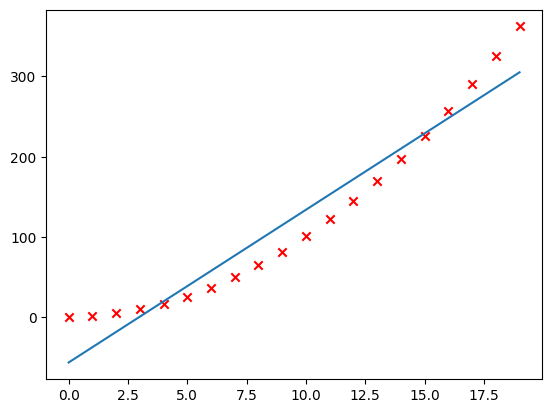

In [6]:
y_predicted = model(x_norm, w, b)
plt.scatter(x_train, y_train, marker="x", color="red")
plt.plot(x_train, y_predicted)
plt.show()

In [7]:
x_train = np.arange(0, 20, 1)
X = x_train ** 2
y_train = 1 + X
X = X.reshape(-1, 1)

In [8]:
X_norm, _, _ = zscore_normalize_features(X)
w, b, _ = gradient_descent(X_norm, y_train, 0.01, 1000)

iteration #0, w = [1.13], b = 1.245, cost = 13908.256065
iteration #100, w = [72.37], b = 79.38468377636809, cost = 1863.423625429979
iteration #200, w = [98.44], b = 107.9863351753819, cost = 249.6608914577542
iteration #300, w = [107.98], b = 118.45546460124366, cost = 33.44948506225881
iteration #400, w = [111.48], b = 122.28750455608434, cost = 4.481551132807645
iteration #500, w = [112.76], b = 123.69015511260716, cost = 0.6004367636329426
iteration #600, w = [113.22], b = 124.20357057979948, cost = 0.08044632236430316
iteration #700, w = [113.4], b = 124.39149724530175, cost = 0.010778172113889432
iteration #800, w = [113.46], b = 124.4602844826632, cost = 0.0014440559953822732
iteration #900, w = [113.48], b = 124.48546283620436, cost = 0.00019347415273758645


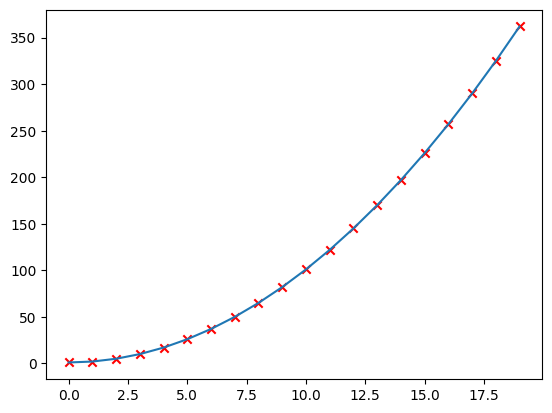

In [9]:
y_predicted = model(X_norm, w, b)
plt.scatter(x_train, y_train, marker="x", color="red")
plt.plot(x_train, y_predicted)
plt.show()

In [10]:
x_train = np.arange(0, 20, 1)
y_train = x_train ** 2
X = np.c_[x_train, x_train ** 2, x_train ** 3]

In [11]:
X_norm, _, _ = zscore_normalize_features(X)
w, b, _ = gradient_descent(X_norm, y_train, 0.01, 1000)

iteration #0, w = [1.1  1.13 1.12], b = 1.235, cost = 13546.307714495404
iteration #100, w = [35.2  37.18 36.92], b = 78.7470557942286, cost = 1028.926125104876
iteration #200, w = [36.26 39.25 39.31], b = 107.11897505349124, cost = 144.28000727312687
iteration #300, w = [35.66 39.53 39.9 ], b = 117.50401508637421, cost = 27.271623605689665
iteration #400, w = [35.03 39.72 40.36], b = 121.30527560382656, cost = 11.057803969064938
iteration #500, w = [34.44 39.89 40.76], b = 122.69665989081919, cost = 8.429671100562413
iteration #600, w = [33.9  40.06 41.13], b = 123.20595153899784, cost = 7.694571775667255
iteration #700, w = [33.4  40.22 41.46], b = 123.39236875337158, cost = 7.273988153549935
iteration #800, w = [32.94 40.38 41.76], b = 123.4606034828024, cost = 6.946438210200621
iteration #900, w = [32.52 40.53 42.02], b = 123.48557960057217, cost = 6.673895937597161


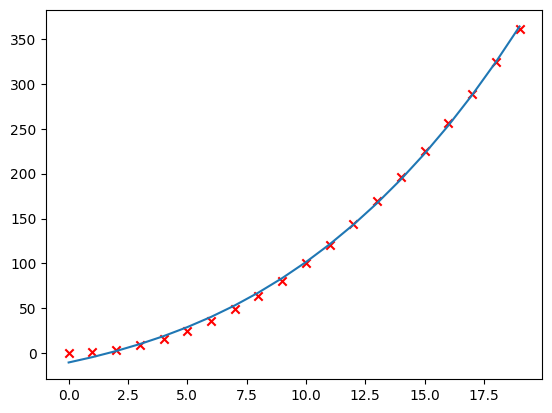

In [12]:
y_predicted = model(X_norm, w, b)
plt.scatter(x_train, y_train, marker="x", color="red")
plt.plot(x_train, y_predicted)
plt.show()

In [13]:
x_train = np.arange(0, 2 * np.pi, 0.1)
y_train = np.sin(x_train)
X = np.c_[x_train, x_train ** 2, x_train ** 3, x_train ** 4, x_train ** 5, x_train ** 6, x_train ** 7, x_train ** 8]

In [14]:
X_norm, _, _ = zscore_normalize_features(X)
w, b, _ = gradient_descent(X_norm, y_train, 0.01, 1000000)

iteration #0, w = [-0.01 -0.01 -0.   -0.   -0.   -0.   -0.   -0.  ], b = -1.1102368734680162e-06, cost = 0.23587936592656647
iteration #100000, w = [ 1.91 -3.7  -1.59  0.76  1.8   1.54  0.35 -1.43], b = -0.00011102368734792415, cost = 0.002521409188234974
iteration #200000, w = [ 2.33 -4.52 -1.82  1.13  2.35  1.91  0.3  -2.04], b = -0.00011102368734817225, cost = 0.00042375478460074444
iteration #300000, w = [ 2.44 -4.73 -1.89  1.23  2.5   2.01  0.28 -2.19], b = -0.0001110236873482231, cost = 0.0002734144737238396
iteration #400000, w = [ 2.47 -4.79 -1.92  1.26  2.55  2.03  0.27 -2.23], b = -0.00011102368734823186, cost = 0.0002622293971141947
iteration #500000, w = [ 2.47 -4.8  -1.93  1.27  2.57  2.04  0.26 -2.24], b = -0.00011102368734823113, cost = 0.0002609892395385841
iteration #600000, w = [ 2.47 -4.79 -1.95  1.28  2.58  2.04  0.25 -2.23], b = -0.0001110236873482375, cost = 0.00026046067091944366
iteration #700000, w = [ 2.47 -4.79 -1.96  1.29  2.59  2.03  0.24 -2.23], b = -0.000

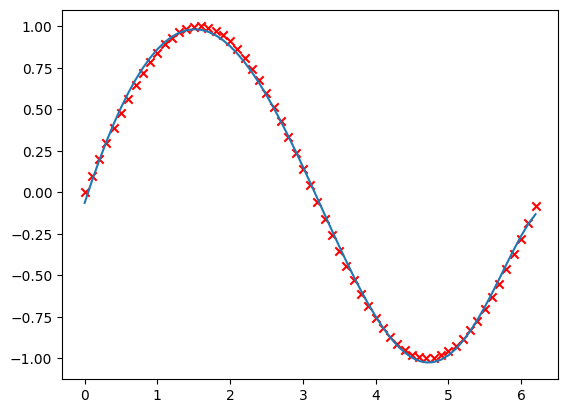

In [15]:
y_predicted = model(X_norm, w, b)
plt.scatter(x_train, y_train, marker="x", color="red")
plt.plot(x_train, y_predicted)
plt.show()